In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
book = pd.read_csv('bestsellers with categories.csv')
book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
book.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
book['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Option B: Facing Adversity, Building Resilience, and Finding Joy                 1
The Mueller Report                                                               1
The Ugly Truth (Diary of a Wimpy Kid, Book 5)                                    1
The Love Dare                                                                    1
Fire and Fury: Inside the Trump White House                                      1
Name: Name, Length: 351, dtype: int64

In [6]:
book.drop_duplicates('Name', keep = 'last', inplace = True)
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         351 non-null    object 
 1   Author       351 non-null    object 
 2   User Rating  351 non-null    float64
 3   Reviews      351 non-null    int64  
 4   Price        351 non-null    int64  
 5   Year         351 non-null    int64  
 6   Genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


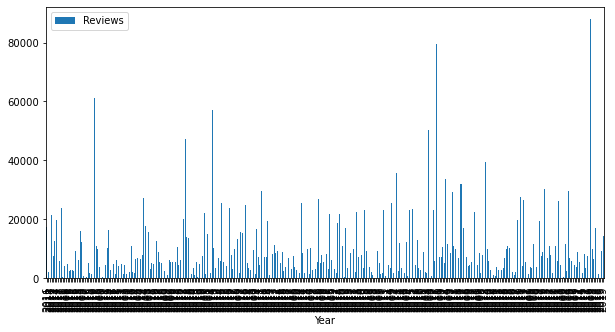

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
book.plot(kind = 'bar', x = 'Year', y = 'Reviews', ax = ax)
plt.show()

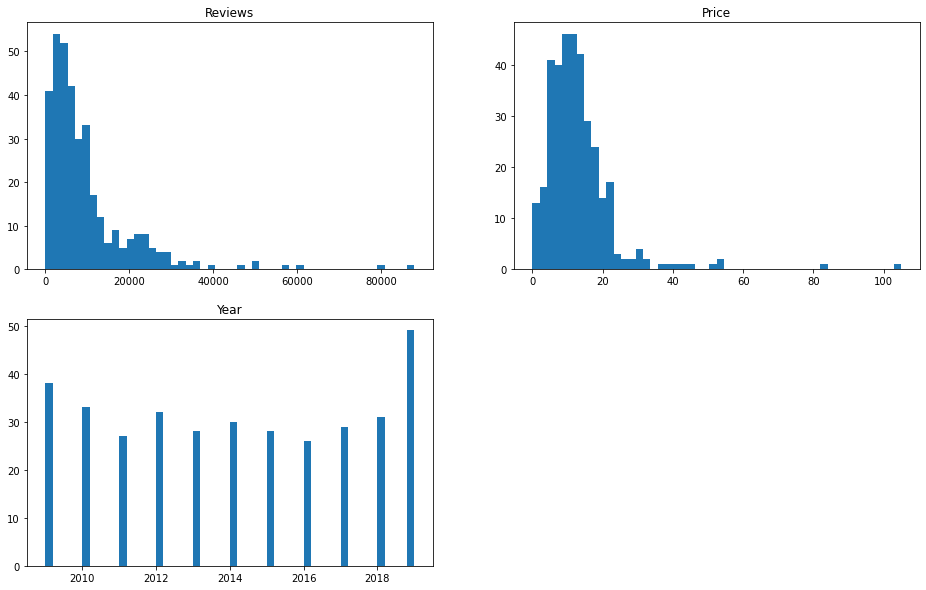

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.delaxes(axs[1,1])

axs[0,0].hist(book['Reviews'], bins=50)
axs[0,1].hist(book['Price'], bins=50)
axs[1,0].hist(book['Year'], bins=50)
axs[0,0].title.set_text('Reviews')
axs[0,1].title.set_text('Price')
axs[1,0].title.set_text('Year')

plt.show()

In [10]:
book_for_tree = book.copy(deep=True)
book_for_tree

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [11]:
book.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.056105,-0.025012,0.237591
Reviews,-0.056105,1.000000,-0.040079,0.317818
Price,-0.025012,-0.040079,1.000000,-0.128949
Year,0.237591,0.317818,-0.128949,1.000000


<AxesSubplot:>

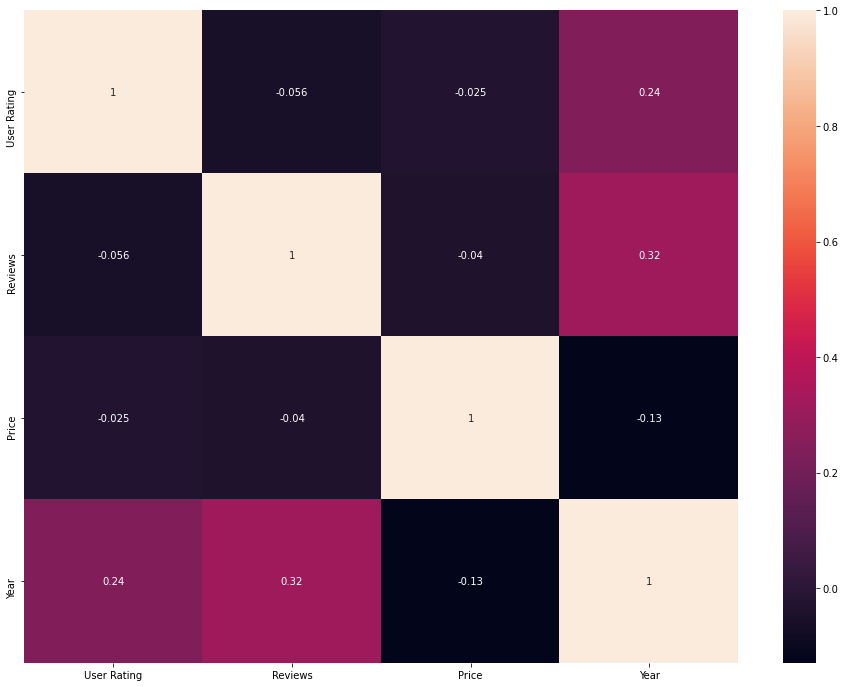

In [12]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(book.corr(),annot=True,ax=ax)

In [13]:
book.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

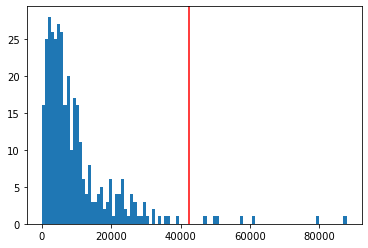

In [14]:
plt.hist(book['Reviews'], bins=100)
outlier_limit = (book['Reviews'].mean() + 3*book['Reviews'].std())
plt.axvline(x=outlier_limit, color='r')
plt.show()

In [15]:
book = book[book['Reviews'] <= outlier_limit]

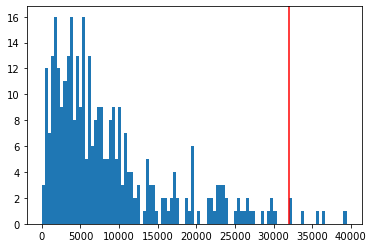

In [16]:
plt.hist(book['Reviews'], bins=100)
outlier_limit = (book['Reviews'].mean() + 3*book['Reviews'].std())
plt.axvline(x=outlier_limit, color='r')
plt.show()

In [25]:
book=pd.get_dummies(book, drop_first=True, columns=['Year', 'Genre'])
book.head()

,Name,Author,User Rating,Reviews,Price,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Genre_Non Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,0,0,0,0,0,0,1,0,0,0,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,0,1,0,0,0,0,0,0,0,0,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,0,0,0,0,0,0,0,0,1,0,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,0,0,0,0,0,0,0,1,0,0,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,0,0,0,0,0,0,0,0,0,1,1


In [26]:
z = ['Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Genre_Non Fiction']
t = ['Reviews', 'Price', 'Year_2010']
y = book['User Rating'].values.reshape(-1,1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for v in z:
    t.append(v)
    X = book[t]
    reg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_pred_train = reg.predict(X_train)
    R_squared = reg.score(X_test, y_test)
    print(R_squared)

0.005765687404769793
0.005765687404768349
0.005765687404769015
0.005765687404768349
0.0057656874047694595
0.0057656874047694595
0.005765687404770126
0.005765687404768682
0.005765687404768127
0.005765687404768571
0.0057656874047694595


In [28]:
X1 = np.array(book_for_tree[['Reviews', 'Price', 'Year', 'User Rating']])
y1 = np.array(book_for_tree[['Genre']])
from sklearn import tree

tree = tree.DecisionTreeClassifier(max_depth=4)
tree = tree.fit(X1, y1)

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 1) 

In [72]:
tree.score(X1, y1)

0.7492877492877493

In [73]:
y1_pred = tree.predict(X1_test)
y1_pred

array(['Non Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Non Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Non Fiction', 'Fiction', 'Non Fiction', 'Non Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Non Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Fiction', 'Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Non Fiction', 'Non Fiction', 'Non Fiction', 'Non Fiction',
       'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Non F

In [74]:
df = pd.DataFrame(y1_pred, columns=['Predicted'])

In [75]:
book1 = pd.read_csv('bestsellers with categories.csv')

In [76]:
pd.set_option("display.max_rows",None)
result = display(pd.concat([book1, df],axis = 1))
print(result)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Predicted
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,Non Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,Fiction


None
